<a href="https://colab.research.google.com/github/Rice-from-data/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:

# y = 'health level' - predicted variable, dependent variable
# x = 'took the drug' - explanatory variable, independent variable


# confounding variables, omitted variables



# # we will be unable to assess causality, our goal is predictive accuracy and generalizability

# # econometrics is statistics to determine causal effects

In [3]:
import random
random.seed(42) # Random seed for reproducability
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [4]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [5]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=150.42273427770718, mobile=False), User(purchased=True, time_on_site=284.06235530493245, mobile=True), User(purchased=True, time_on_site=140.37976895454653, mobile=True), User(purchased=True, time_on_site=49.206452507812216, mobile=True), User(purchased=False, time_on_site=167.81563803588924, mobile=True), User(purchased=False, time_on_site=20.484876517641524, mobile=True), User(purchased=False, time_on_site=167.3540069049869, mobile=True), User(purchased=False, time_on_site=447.75054592529114, mobile=False), User(purchased=True, time_on_site=57.93525538719398, mobile=True), User(purchased=True, time_on_site=292.6494305470663, mobile=True)]


In [6]:
for _ in range(100):
  print(random.uniform(0,10))

0.4403790726280954
8.629284949026113
2.4455145035670345
4.717645895777381
3.829794743673991
1.5008466824115008
9.311600771571856
8.574851977479724
5.528647884958645
9.13947669521129
7.406658281065769
4.193693043627985
3.2180201447206125
4.162565985013154
7.202879214281971
2.7125795800981667
0.7788706996691197
3.7280816673786132
5.020409425595828
9.019410092582714
1.7934435027230566
8.043380194587566
9.81413863941495
9.540794074604277
0.689264377727451
4.650941779168861
2.8230687062090243
8.44846504261328
3.273009217261189
5.530913953240676
0.07969173557455522
2.0067115345295585
5.638067408241869
3.0390930726808296
6.2271752389210455
4.639266905804993
5.9169093498481615
4.933606758548849
7.726132629505243
1.954224238728235
9.004432972264233
7.6048222032169654
2.4512687437658287
0.06377882751804065
4.100361095660199
2.32997741859743
3.464236977394062
8.39574006896174
8.77198614251575
9.509902621434433
0.014620405355777466
6.573038501759978
8.490059877789218
7.272150390409725
1.0394901935

In [7]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,150.422734,False
1,True,284.062355,True
2,True,140.379769,True
3,True,49.206453,True
4,False,167.815638,True


In [8]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.789338167851291,5.836487686604824,7.267690340465448,7.280322437947023,7.733814701629437,7.772242279186957,7.994578759409748,8.373541587279558,9.106003254765849,9.38379653305911,...,582.5363605031145,582.9362427920347,588.8783154469735,590.65747470592,593.8187768755912,597.1381204299279,597.7116143416571,598.547187832115,599.088120104121,599.5766563635087
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,1,0,1,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,1,1
True,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [9]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(5.196, 124.547]","(124.547, 243.304]","(243.304, 362.062]","(362.062, 480.819]","(480.819, 599.577]"
purchased,,,,,
False,227,238,111,23,37
True,106,133,84,20,21


In [10]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(5.196, 124.547]","(124.547, 243.304]","(243.304, 362.062]","(362.062, 480.819]","(480.819, 599.577]"
purchased,,,,,
False,0.681682,0.641509,0.569231,0.534884,0.637931
True,0.318318,0.358491,0.430769,0.465116,0.362069


In [11]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.704,0.613333
True,0.296,0.386667


In [12]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

pd.crosstab(user_data['mobile'], [user_data['purchased'], 
                                  time_bins], rownames=['device'], 
                                  colnames=['purchased', 'time on site'], normalize='index')

purchased               False                                        \
time on site (5.196, 124.547] (124.547, 243.304] (243.304, 362.062]   
device                                                                
False                0.148000              0.172              0.144   
True                 0.253333              0.260              0.100   

purchased                                                     True   \
time on site (362.062, 480.819] (480.819, 599.577] (5.196, 124.547]   
device                                                                
False                     0.092              0.148            0.016   
True                      0.000              0.000            0.136   

purchased                                                              \
time on site (124.547, 243.304] (243.304, 362.062] (362.062, 480.819]   
device                                                                  
False                  0.044000              0.072               0.08   
True                   0.162667              0.088               0.00   

purchased                        
time on site (480.819, 599.577]  
device                           
False                     0.084  
True                      0.000

In [13]:
user_data.dtypes

purchased          bool
time_on_site    float64
mobile             bool
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99bab2c9e8>,
      dtype=object)

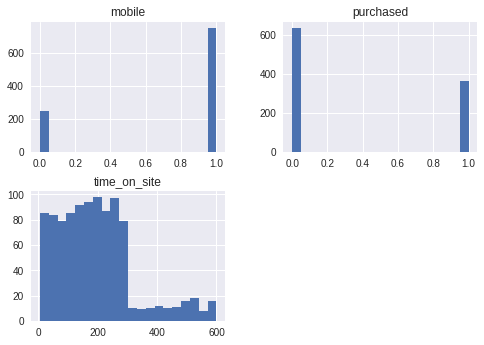

In [14]:
user_data.hist(bins=20)

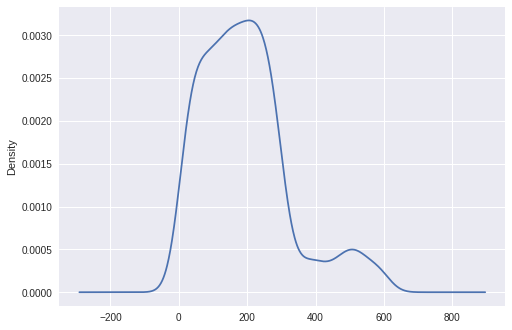

In [15]:
user_data['time_on_site'].plot.density()

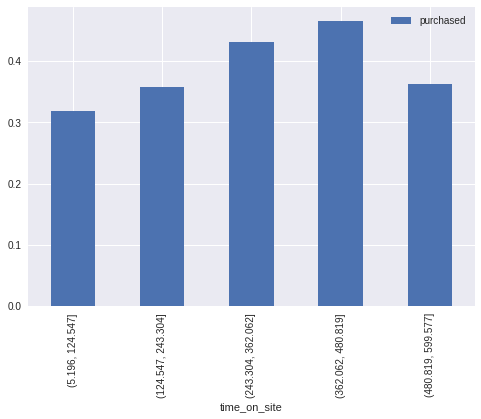

In [16]:
pd.pivot_table(user_data, values='purchased', index=time_bins).plot.bar();
# user_data.plot.bar(x='mobile' y='purchased')



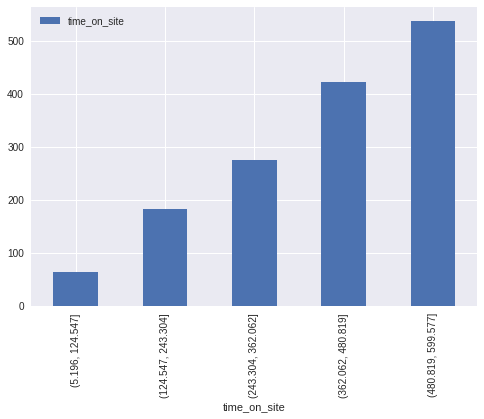

In [17]:
pd.pivot_table(user_data, values='time_on_site', index=time_bins).plot.bar();


In [18]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')
print(type(ct))
ct

<class 'pandas.core.frame.DataFrame'>


purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(5.196, 124.547]    0.210227  0.413043  0.054054  0.351724
(124.547, 243.304]  0.244318  0.423913  0.148649  0.420690
(243.304, 362.062]  0.204545  0.163043  0.243243  0.227586
(362.062, 480.819]  0.130682  0.000000  0.270270  0.000000
(480.819, 599.577]  0.210227  0.000000  0.283784  0.000000

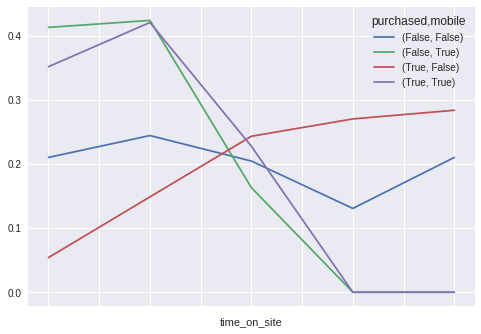

In [19]:
ct.plot()

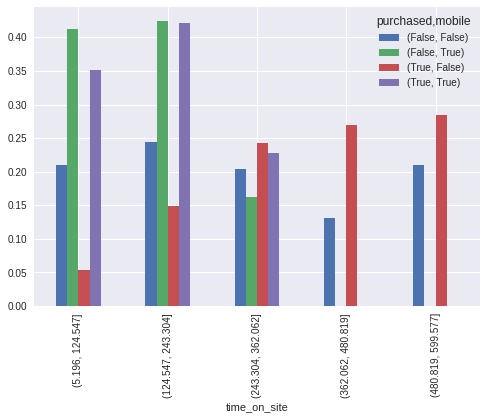

In [20]:
ct.plot(kind='bar')

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [21]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

df_persons = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-databackedassertions/persons.csv', index_col=0)
df_persons.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [22]:
# df_persons.dtypes
df_persons.isna().sum()

age              0
weight           0
exercise_time    0
dtype: int64

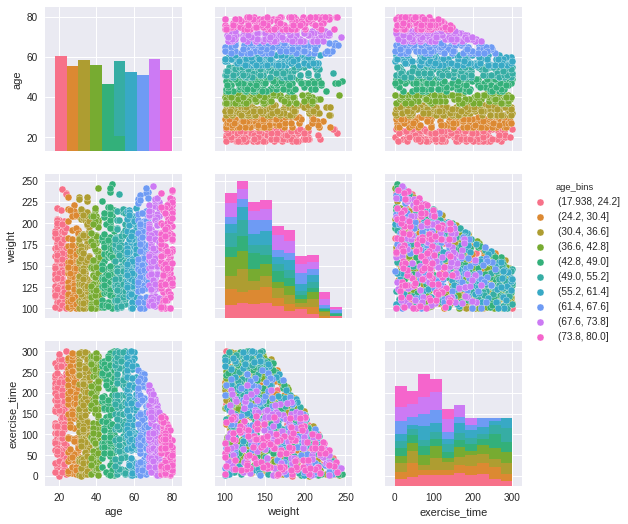

In [38]:
import seaborn as sns
import pandas as pd

# create 10 age bins

# time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
age_bins = pd.cut(df_persons['age'], 10)

# age_bins.describe()
# age_bins_df = pd.DataFrame(age_bins)
# age_bins_df.rename(index=str, columns={"age": "age_bins"})

df_persons['age_bins'] = age_bins
# df_persons.head()

sns.pairplot(df_persons, hue='age_bins')

This pairplot is interesting because it quickly shows us relations between all the bariables, in particular it shows a very strong trend that exercise time decreases with weight. 

Exercise_time and age don't appear to have a strong relation until age sixty, at which point exercise time falls sharply. 

Age and weight don't seem to be strongly related.


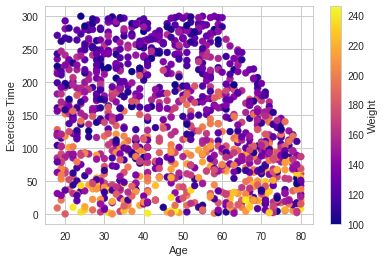

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

plt.scatter('age', 'exercise_time', c = 'weight', cmap="plasma", data=df_persons)
plt.xlabel("Age")
plt.ylabel("Exercise Time")
plt.colorbar().set_label('Weight')
plt.show()

The above graph shows that exercise time and age are not strongly related until around age 60. At age 60 exercise time falls sharply.

This graph also includes a color sequence to see the weight variable of each data point, this shows that, broadly speaking, regardless of age, higher weight is correlated with lower exercise_time as the lighter colors of the chart are clustered towards the bottom of the y-axis.

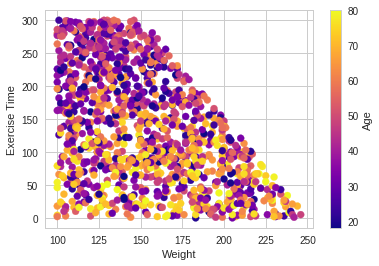

In [0]:
plt.scatter('weight', 'exercise_time', c = 'age', cmap="plasma", data=df_persons)
plt.xlabel("Weight")
plt.ylabel("Exercise Time")
plt.colorbar().set_label('Age')
plt.show()

The above graph shows that after 150lbs, exercise_time relative to weight falls sharply. The colormap also shows that higher ages are falling lower on the y-axis so this relates to the first graph with the post-60 exercise decline.

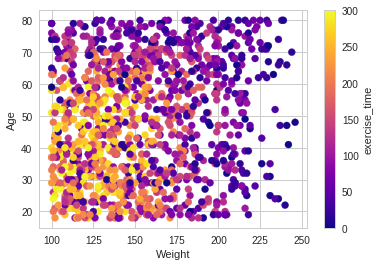

In [0]:
plt.scatter('weight', 'age', c = 'exercise_time', cmap="plasma", data=df_persons)
plt.xlabel("Weight")
plt.ylabel("Age")
plt.colorbar().set_label('exercise_time')
plt.show()

Just to drive home the point, there doesn't seem to be much correlation between Age and Weight, however we can see that high exercise times are a little correlated with lower weight and lower age based on the colormap. 

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

All the variables are discrete and the dataframe is 'wide' meaning each instance is a single object at a moment in time with three dimensions.

2.  What are the relationships between the variables?

Weight and age are not related.

Weight and exercise time are inversly related after 150lbs.

Exercise time and age are inversely related after age 60.

3.  Which relationships are "real", and which spurious?

Honestly, I'm not sure. I don't see a spurius relationship so maybe I'm missing something.


In [0]:
df_persons.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)